In [1]:
# import necessary package
import tensorflow as tf
import numpy as np
import pathlib
import datetime

# printout versions
print(f"Tensor Flow Version: {tf.__version__}")
print(f"numpy Version: {np.version.version}")

C:\Users\kwon\anaconda3\envs\GPUtest2\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\kwon\anaconda3\envs\GPUtest2\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\kwon\anaconda3\envs\GPUtest2\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\kwon\anaconda3\envs\GPUtest2\lib\site-packages\tensorflow\

Tensor Flow Version: 1.9.0
numpy Version: 1.19.1


In [70]:
# Raw Dataset Directory
data_dir = pathlib.Path("./flower_photos")
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)
# classnames in the dataset specified
CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt" ])
print(CLASS_NAMES)
# print length of class names
output_class_units = len(CLASS_NAMES)
print(output_class_units)
print(data_dir)

3670
['daisy' 'dandelion' 'roses' 'sunflowers' 'tulips']
5
flower_photos


In [2]:
model = tf.keras.models.Sequential([
    # 1st conv
  tf.keras.layers.Conv2D(96, (11,11),strides=(4,4), activation='relu', input_shape=(227, 227, 3)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, strides=(2,2)),
    # 2nd conv
  tf.keras.layers.Conv2D(256, (11,11),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
     # 3rd conv
  tf.keras.layers.Conv2D(384, (3,3),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
    # 4th conv
  tf.keras.layers.Conv2D(384, (3,3),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
    # 5th Conv
  tf.keras.layers.Conv2D(256, (3, 3), strides=(1, 1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, strides=(2, 2)),
  # To Flatten layer
  tf.keras.layers.Flatten(),
  # To FC layer 1
  tf.keras.layers.Dense(4096, activation='relu'),
    # add dropout 0.5 ==> tf.keras.layers.Dropout(0.5),
  #To FC layer 2
  tf.keras.layers.Dense(4096, activation='relu'),
    # add dropout 0.5 ==> tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(2, activation='softmax')
])

In [3]:
BATCH_SIZE = 100
IMG_HEIGHT=227
IMG_WIDTH = 227
STEPS_PER_EPOCH = 600

image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.)

data_dir="C:/Users/kwon/Mobile_Mask_RCNN/data/deficiency/train"
train_data_gen = image_generator.flow_from_directory(directory=data_dir,
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size = (IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(np.array(['BG','Crack'])))
data_dir="C:/Users/kwon/Mobile_Mask_RCNN/data/deficiency/val"
val_data_gen = image_generator.flow_from_directory(directory=data_dir,
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size = (IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(np.array(['BG','Crack'])))


Found 65021 images belonging to 2 classes.
Found 4242 images belonging to 2 classes.


In [72]:
# Shape of inputs to NN Model
BATCH_SIZE = 32             # Can be of size 2^n, but not restricted to. for the better utilization of memory
IMG_HEIGHT = 227            # input Shape required by the model
IMG_WIDTH = 227             # input Shape required by the model
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)

# Rescalingthe pixel values from 0~255 to 0~1 For RGB Channels of the image.
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
# training_data for model training
data_dir = "C:/Users/kwon/Mobile_Mask_RCNN/notebooks/AlexNet/flower_photos"
train_data_gen = image_generator.flow_from_directory(directory=data_dir,
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH), #Resizing the raw dataset
                                                     classes = list(CLASS_NAMES))
data_dir="C:/Users/kwon/Mobile_Mask_RCNN/notebooks/AlexNet/flower_photos_val"
val_data_gen = image_generator.flow_from_directory(directory=data_dir,
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size = (IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))

Found 3670 images belonging to 5 classes.
Found 172 images belonging to 5 classes.


In [9]:
tf.keras.optimizers.SGD(lr=0.1)

In [4]:
# Specifying the optimizer, Loss function for optimization & Metrics to be displayed
sgd = tf.keras.optimizers.SGD(lr=1e-6)
model.compile(optimizer=sgd, loss="categorical_crossentropy", metrics=['accuracy'])

# Summarizing the model architecture and printing it out
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
batch_normalization (BatchNo (None, 55, 55, 96)        384       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 256)       2973952   
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 256)       1024      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 384)       885120    
_________________________________________________________________
batch_normalization_2 (Batch (None, 27, 27, 384)       1536      
__________

In [5]:
# callbacks at training
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if (logs.get("accuracy")==1.00 and logs.get("loss")<0.03):
            print("\nReached 100% accuracy so stopping training")
            self.model.stop_training =True
callbacks = myCallback()

# TensorBoard.dev Visuals
log_dir="logs\\fit\\" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [6]:
# history = model.fit_generator(
#     train_data_gen,
#     steps_per_epoch=STEPS_PER_EPOCH,
#     epochs=50,
#     validation_data=val_data_gen.flow(val_X, val_y, batch_size=BATCH_SIZE),
#     validation_steps=STEPS_PER_EPOCH,
#     callbacks=[tensorboard_callback,callbacks])
model.fit_generator(train_data_gen,
                    steps_per_epoch=STEPS_PER_EPOCH,
                    epochs=100,
                    callbacks=[callbacks],
                    validation_data=val_data_gen,
                    validation_steps=30)

Epoch 1/100
600/600 [==============================] - 139s 231ms/step - loss: 0.4260 - acc: 0.8651 - val_loss: 0.3853 - val_acc: 0.8733
Epoch 2/100
600/600 [==============================] - 132s 221ms/step - loss: 0.3949 - acc: 0.8712 - val_loss: 0.4044 - val_acc: 0.8697
Epoch 3/100
600/600 [==============================] - 132s 219ms/step - loss: 0.3764 - acc: 0.8725 - val_loss: 0.4028 - val_acc: 0.8673
Epoch 4/100
600/600 [==============================] - 132s 219ms/step - loss: 0.3753 - acc: 0.8686 - val_loss: 0.4015 - val_acc: 0.8650
Epoch 5/100
600/600 [==============================] - 132s 219ms/step - loss: 0.3641 - acc: 0.8700 - val_loss: 0.4016 - val_acc: 0.8633
Epoch 6/100
600/600 [==============================] - 132s 220ms/step - loss: 0.3630 - acc: 0.8689 - val_loss: 0.4012 - val_acc: 0.8633
Epoch 7/100
600/600 [==============================] - 132s 219ms/step - loss: 0.3523 - acc: 0.8710 - val_loss: 0.4018 - val_acc: 0.8613
Epoch 8/100
600/600 [====================

600/600 [==============================] - 130s 217ms/step - loss: 0.3178 - acc: 0.8727 - val_loss: 0.3970 - val_acc: 0.8657
Epoch 61/100
600/600 [==============================] - 130s 217ms/step - loss: 0.3174 - acc: 0.8726 - val_loss: 0.3964 - val_acc: 0.8637
Epoch 62/100
600/600 [==============================] - 130s 217ms/step - loss: 0.3171 - acc: 0.8731 - val_loss: 0.3974 - val_acc: 0.8633
Epoch 63/100
600/600 [==============================] - 130s 217ms/step - loss: 0.3165 - acc: 0.8725 - val_loss: 0.3971 - val_acc: 0.8640
Epoch 64/100
600/600 [==============================] - 130s 217ms/step - loss: 0.3177 - acc: 0.8720 - val_loss: 0.3976 - val_acc: 0.8643
Epoch 65/100
600/600 [==============================] - 130s 217ms/step - loss: 0.3151 - acc: 0.8723 - val_loss: 0.3968 - val_acc: 0.8640
Epoch 66/100
600/600 [==============================] - 130s 217ms/step - loss: 0.3161 - acc: 0.8726 - val_loss: 0.3972 - val_acc: 0.8637
Epoch 67/100
600/600 [=========================

In [7]:
model.save('AlexNet.h5')

In [39]:
reconstructed_model = tf.keras.models.load_model("AlexNet.h5")
reconstructed_model.compile(optimizer='sgd', loss="categorical_crossentropy", metrics=['accuracy'])
reconstructed_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
batch_normalization (BatchNo (None, 55, 55, 96)        384       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 256)       2973952   
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 256)       1024      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 384)       885120    
_________________________________________________________________
batch_normalization_2 (Batch (None, 27, 27, 384)       1536      
__________

In [40]:
import os
import skimage.io
import random
import cv2
from keras.preprocessing import image
from matplotlib import pyplot as plt
file_names = next(os.walk('C:/Users/kwon/Mobile_Mask_RCNN/notebooks/AlexNet/flower_photos_test'))[2]

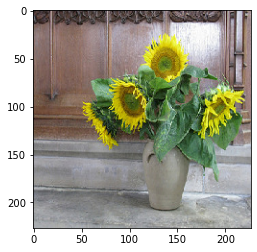

In [41]:
img = image.load_img(os.path.join('C:/Users/kwon/Mobile_Mask_RCNN/notebooks/AlexNet/flower_photos_test', random.choice(file_names)), target_size=(227, 227))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = x

In [43]:
print(images.shape)
classes = reconstructed_model.predict_classes(images)
print(classes)

(1, 227, 227, 3)
[3]
